In [123]:
import eikon as eikon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import datetime as dt
from matplotlib.ticker import FuncFormatter
from functools import partial

In [124]:
%matplotlib notebook

In [125]:
 eikon.set_app_key('1153655a813e49b09943821a11d273d879402478')

In [126]:
rics = ["US1YT=RR", "US2YT=RR", "US5YT=RR", "US10YT=RR", "US30YT=RR"]

In [127]:
table_1993 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '1993-01-01', end_date = '1993-12-31' , interval = 'daily', calendar='native')
table_2002 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2002-01-01', end_date = '2002-10-31' , interval = 'daily', calendar='native')
table_2003 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2003-07-01', end_date = '2004-06-30' , interval = 'daily', calendar='native')
table_2016 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2016-01-01', end_date = '2016-12-31' , interval = 'daily', calendar='native')
table = pd.concat([table_1993, table_2002, table_2003, table_2016], ignore_index= False)

In [139]:
Dates = table.index.tolist()
US2YT = table['US2YT=RR'].values.tolist()
US10YT = table['US10YT=RR'].values.tolist()

spread_2s10s =pd.DataFrame({'Dates':Dates,'US2YT':US2YT,'US10YT':US10YT})

spread_2s10s['spread'] = spread_2s10s['US10YT'] - spread_2s10s['US2YT']

In [140]:
spread_2s10s.index = pd.to_datetime(spread_2s10s.Dates)
spread_2s10s= spread_2s10s.loc[~spread_2s10s.index.duplicated(keep='first')]

In [141]:
spread_2s10s['Year'] = list(map(lambda x: x, spread_2s10s.index.year))
spread_2s10s['Month-Day'] = spread_2s10s.index.strftime('%m-%d')
spread = spread_2s10s.pivot(index='Month-Day', columns='Year', values='spread')

spread[1993].fillna(method='bfill', inplace=True)
spread[2002].fillna(method='bfill', inplace=True)
spread[2003].fillna(method='ffill', inplace=True)
spread[2004].fillna(method='bfill', inplace=True)
spread[2016].fillna(method='bfill', inplace=True)

<IPython.core.display.Javascript object>


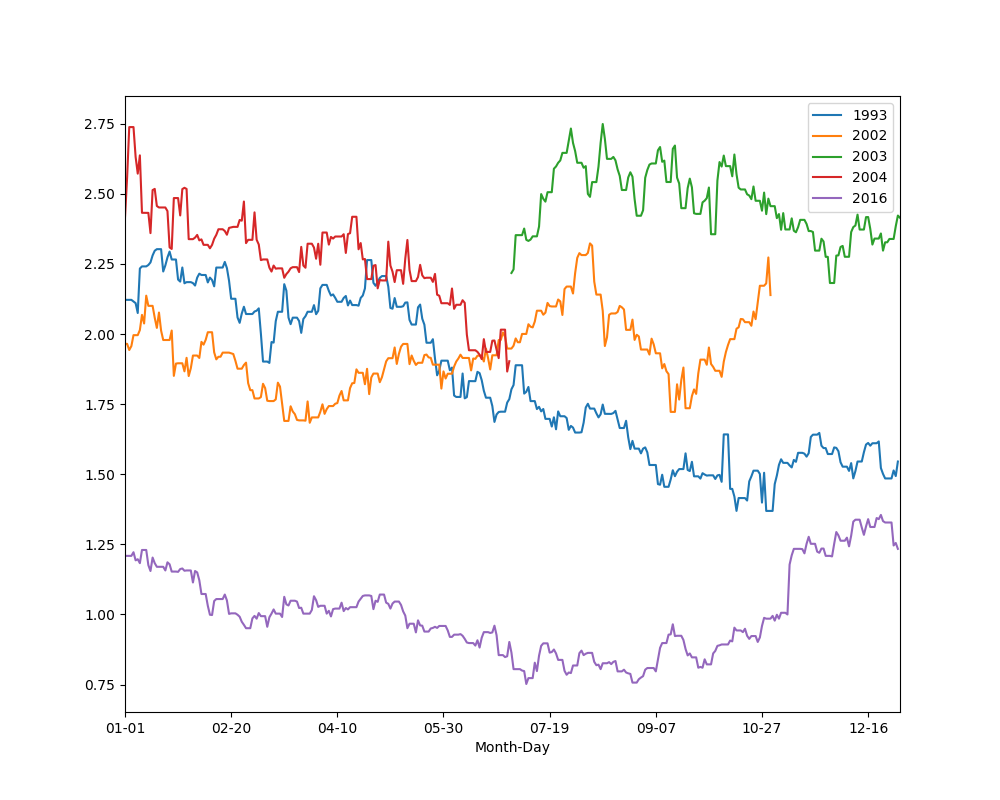

In [142]:
graph = spread.plot(kind='line',figsize=(10,8))
graph.legend(bbox_to_anchor=(1.0,1.0))


In [143]:
spread_0204 = spread_2s10s.loc["2002-01-01":"2004-06-30"]
spread_0204.fillna(method='bfill', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


<IPython.core.display.Javascript object>


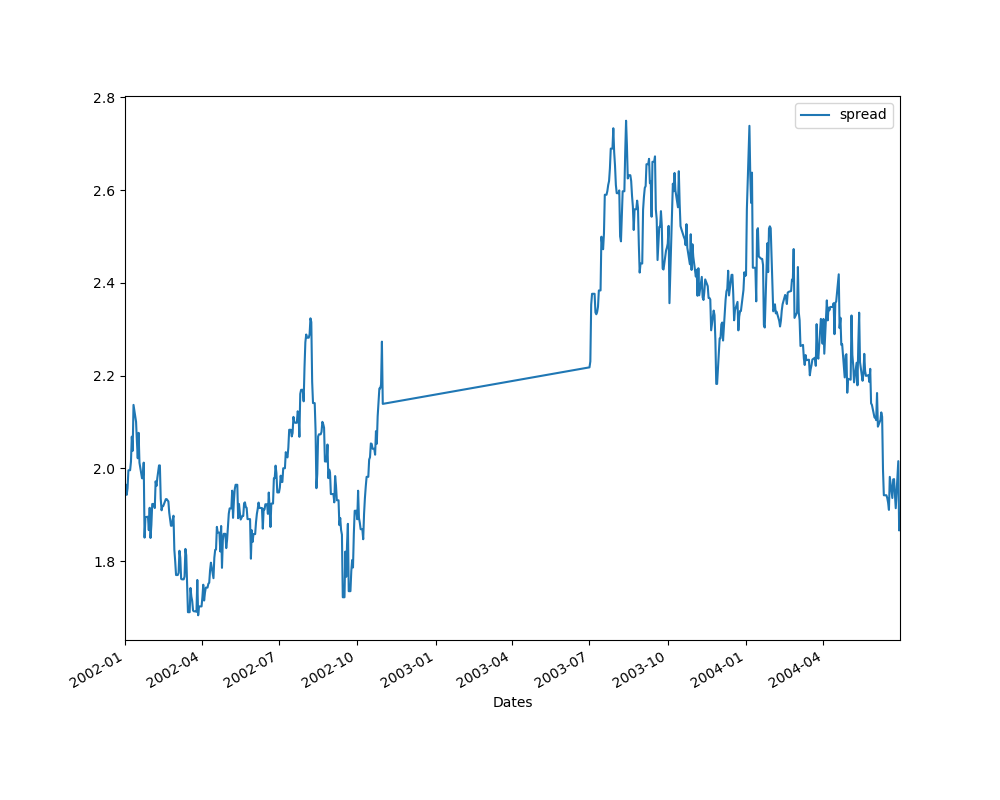

In [145]:
graph2 = spread_0204.plot(x = 'Dates', y = 'spread', kind='line',figsize=(10,8))
graph2.legend(bbox_to_anchor=(1.0,1.0))

In [146]:
Dates = table.index.tolist()
US2YT = table['US2YT=RR'].values.tolist()
US30YT = table['US30YT=RR'].values.tolist()

spread_2s30s =pd.DataFrame({'Dates':Dates,'US2YT':US2YT,'US30YT':US30YT})

spread_2s30s['spread'] = spread_2s30s['US30YT'] - spread_2s30s['US2YT']

In [147]:
spread_2s30s.index = pd.to_datetime(spread_2s30s.Dates)
spread_2s30s= spread_2s30s.loc[~spread_2s30s.index.duplicated(keep='first')]

In [148]:
spread_2s30s['Year'] = list(map(lambda x: x, spread_2s10s.index.year))
spread_2s30s['Month-Day'] = spread_2s10s.index.strftime('%m-%d')
spread1 = spread_2s30s.pivot(index='Month-Day', columns='Year', values='spread')

spread1[1993].fillna(method='bfill', inplace=True)
spread1[2002].fillna(method='bfill', inplace=True)
spread1[2003].fillna(method='ffill', inplace=True)
spread1[2004].fillna(method='bfill', inplace=True)
spread1[2016].fillna(method='bfill', inplace=True)

<IPython.core.display.Javascript object>


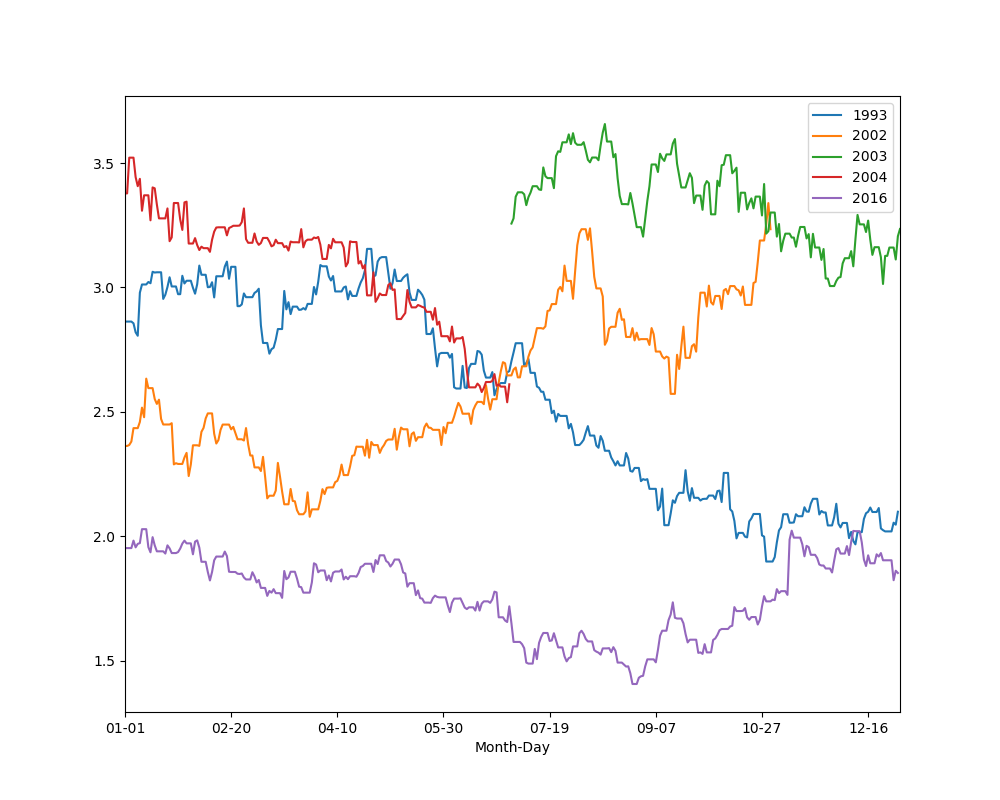

In [149]:
graph3 = spread1.plot(kind='line',figsize=(10,8))
graph3.legend(bbox_to_anchor=(1.0,1.0))

In [150]:
spread_02041 = spread_2s30s.loc["2002-01-01":"2004-06-30"]
spread_02041.fillna(method='bfill', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


<IPython.core.display.Javascript object>


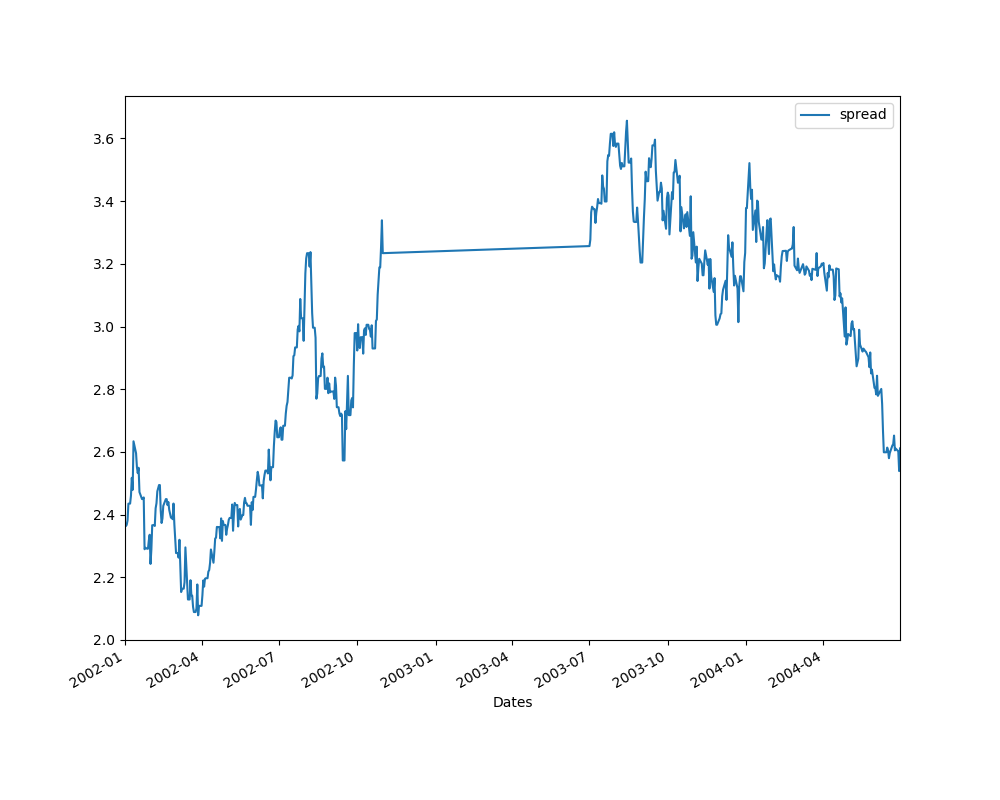

In [151]:
graph4 = spread_02041.plot(x = 'Dates', y = 'spread', kind='line',figsize=(10,8))
graph4.legend(bbox_to_anchor=(1.0,1.0))